### Predicting the capacity in Mega Watts

In [1]:
#importing the rquired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
#importing the csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


There are different types of features in the dataset like name of the country,the place where the power generation plants are located there latitudes,longitudes,the main source of power,the year in which the plant is established,the owner of the powerplqant like etc we have different features by using them we have to predict both capacity and type of fuel.

In [3]:
#checking for the shape of the data
data.shape

(908, 25)

There are 908 rows and 25 columns in the dataset

In [4]:
#Checking  Nulls in the dataset
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are many Nulls present in the dataset and am replacing them with imputing techniques and if the null values are more than 60% in the dataset am dropping those columns because they doesnot give good prediction so am dropping those columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

There are both object type and float type of data present in the dataset.

In [6]:
#Checking for statistical information
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


There  are null values present so we will deal with null values and then check for the stats.

### Data Preprocessing

In [7]:
#Dropping the columns which are having null values more than 60% of the data
data.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [8]:
#Head method
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [9]:
data.shape

(908, 19)

In [10]:
#Filling the NaN values of categorical columns
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [11]:
#filling the NaN values of continous column
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())

In [12]:
#year cannot be as float type so converting the columns which are having with year as float
data['commissioning_year']=data['commissioning_year'].astype(object)
data['year_of_capacity_data']=data['year_of_capacity_data'].astype(object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    object 
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      908 non-null    object 
 12  year_of_capacity_data   908 non-null    object 
 13  generation_gwh_2013     908 non-null    float64
 14  generation_gwh_2014     908 non-null    fl

In [14]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


In [15]:
#dropping the columns which are not required for our prediction
data.drop(columns=['country','country_long','name','gppd_idnr','source','url','geolocation_source','generation_data_source'],axis=1,inplace=True)

In [16]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,2013,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,2013,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,2004,2018,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015,2018,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [17]:
#Subtracting the data of the data data taken year and the commisioning year
data['commissioning_year']=data['year_of_capacity_data']-data['commissioning_year']

In [18]:
#year_of_capacity_data is common as 2018 which is not required so am gng head and dropping the column
data.drop(columns=['year_of_capacity_data'],axis=1,inplace=True)

In [19]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,7,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,14,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,3,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,Wind,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,Coal,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [20]:
data.shape

(908, 10)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    object 
 5   generation_gwh_2013  908 non-null    float64
 6   generation_gwh_2014  908 non-null    float64
 7   generation_gwh_2015  908 non-null    float64
 8   generation_gwh_2016  908 non-null    float64
 9   generation_gwh_2017  908 non-null    float64
dtypes: float64(8), object(2)
memory usage: 71.1+ KB


In [22]:
#Checking for statistical
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


There is lots of skewness in the data the difference of mean and standard deviation is more.So lets plot some graphs and see how the data is distributed.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

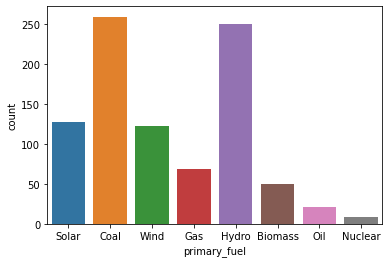

In [23]:
#Count plot for catergorical column
sns.countplot(data['primary_fuel'])

There are different sources to produce power.We can generate the power from sun,Thermal(coal),wind,gas,water(hydro),biomass(waste),oil,nuclear

In [24]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(data['primary_fuel'])
data['primary_fuel']=lab_enc

In [25]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(data['commissioning_year'])
data['commissioning_year']=lab_enc

In [26]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,7,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,14,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,3,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


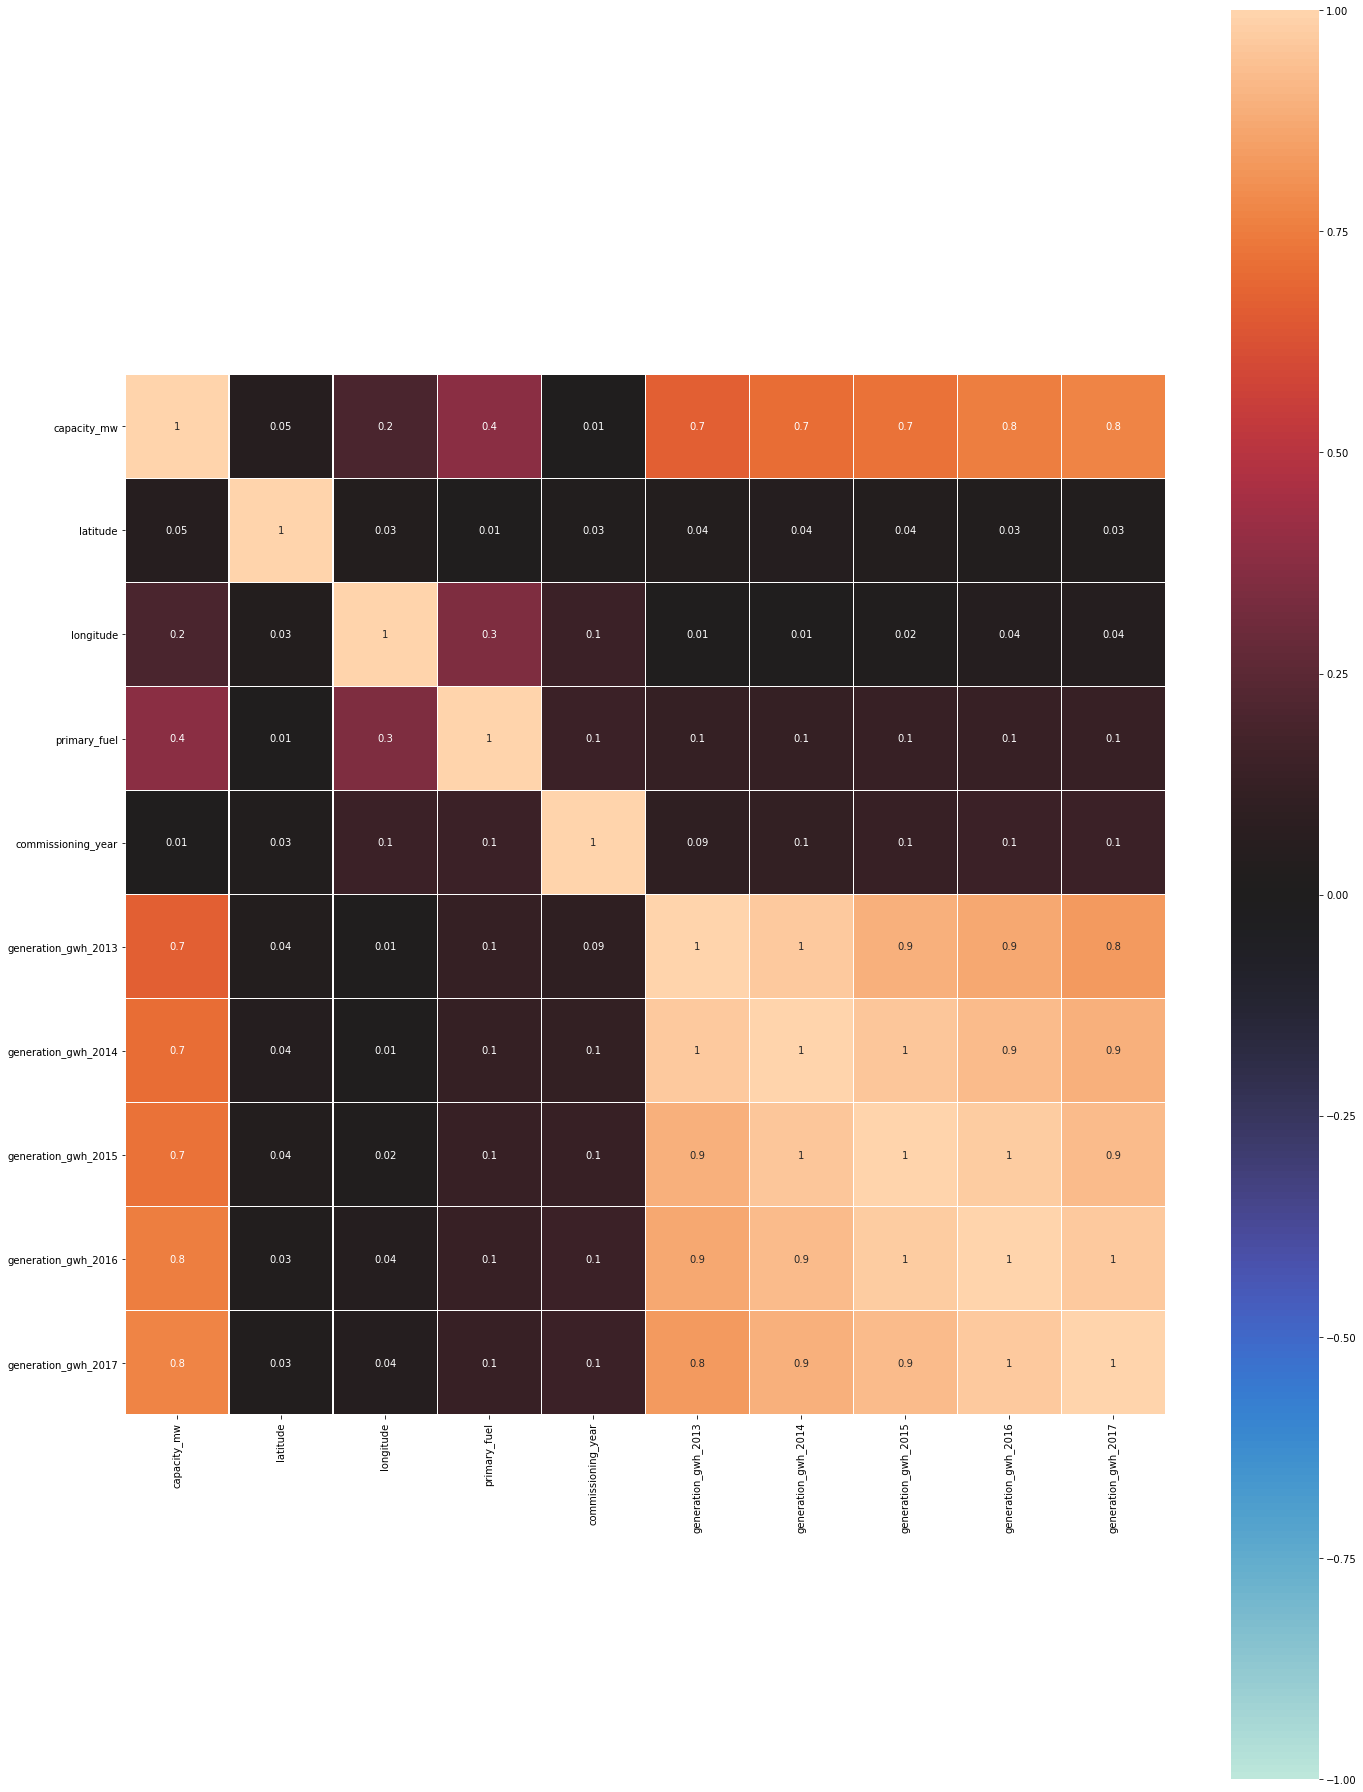

In [27]:
#lets plot heat map to find the multicollinearty with the features
df_corr=data.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

The label is highly correlated with the generation of power in different years and it very less correlated with commissioning year and there is multi collinearity exsists with some features like geneartion gwh of all the years are highly correlated.100% of collinearity exsists.

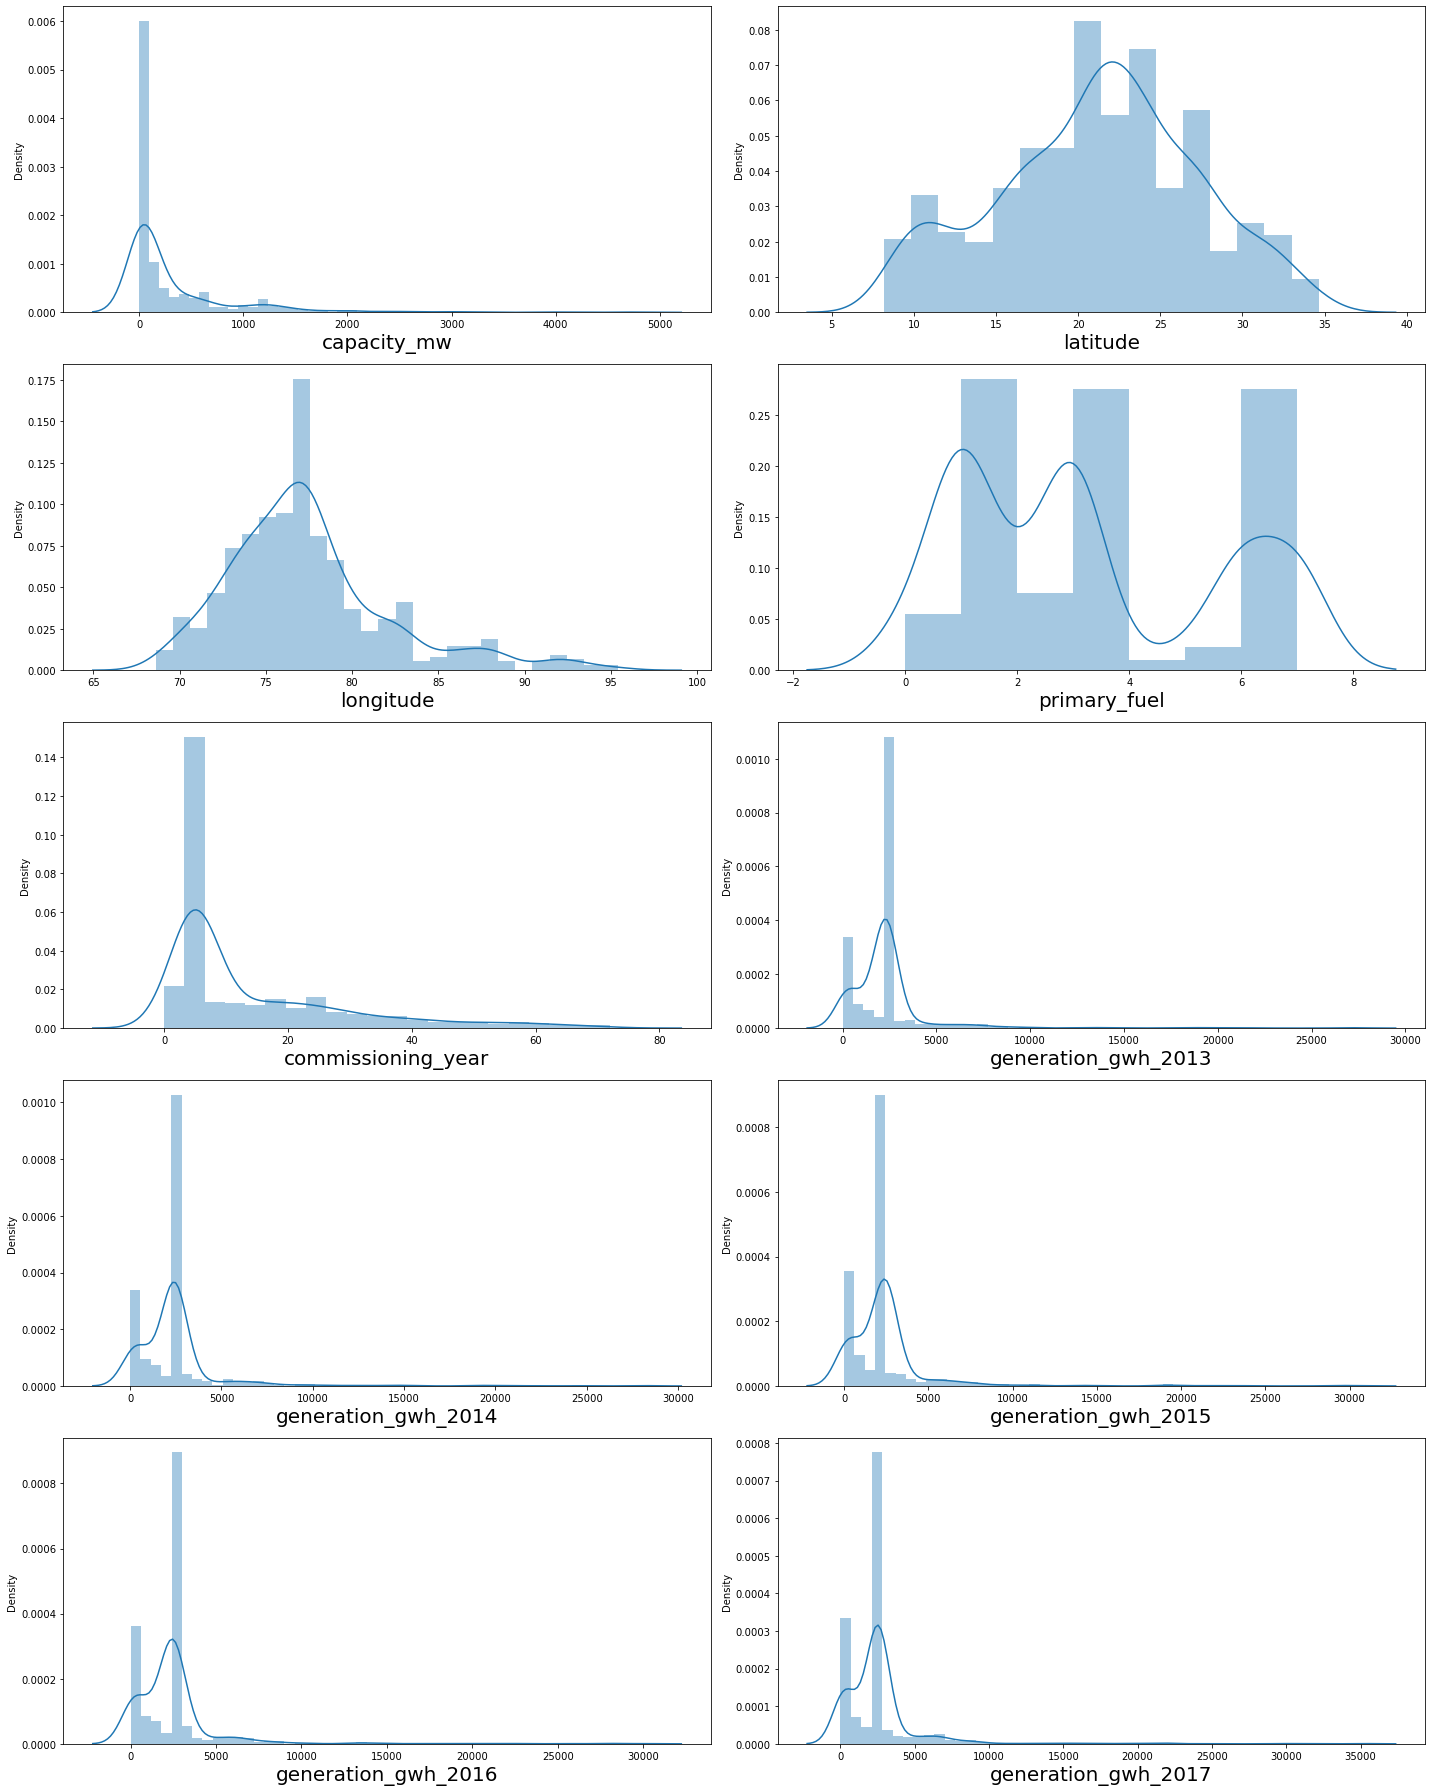

In [28]:
#Lets again check for data using dist plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


Our data seems to be normal there is lots of skewness in the data lets use log transformation to remove skewness from the data.

In [29]:
data['capacity_mw']=np.log(1+data['capacity_mw'])
data['longitude']=np.log(1+data['longitude'])
data['commissioning_year']=np.log(1+data['commissioning_year'])
data['generation_gwh_2013']=np.log(1+data['generation_gwh_2013'])
data['generation_gwh_2014']=np.log(1+data['generation_gwh_2014'])
data['generation_gwh_2015']=np.log(1+data['generation_gwh_2015'])
data['generation_gwh_2016']=np.log(1+data['generation_gwh_2016'])
data['generation_gwh_2017']=np.log(1+data['generation_gwh_2017'])

In [30]:
data.skew()

capacity_mw            0.125029
latitude              -0.147391
longitude              0.924113
primary_fuel           0.471141
commissioning_year     0.531101
generation_gwh_2013   -2.699707
generation_gwh_2014   -2.589757
generation_gwh_2015   -2.311574
generation_gwh_2016   -2.269502
generation_gwh_2017   -2.278767
dtype: float64

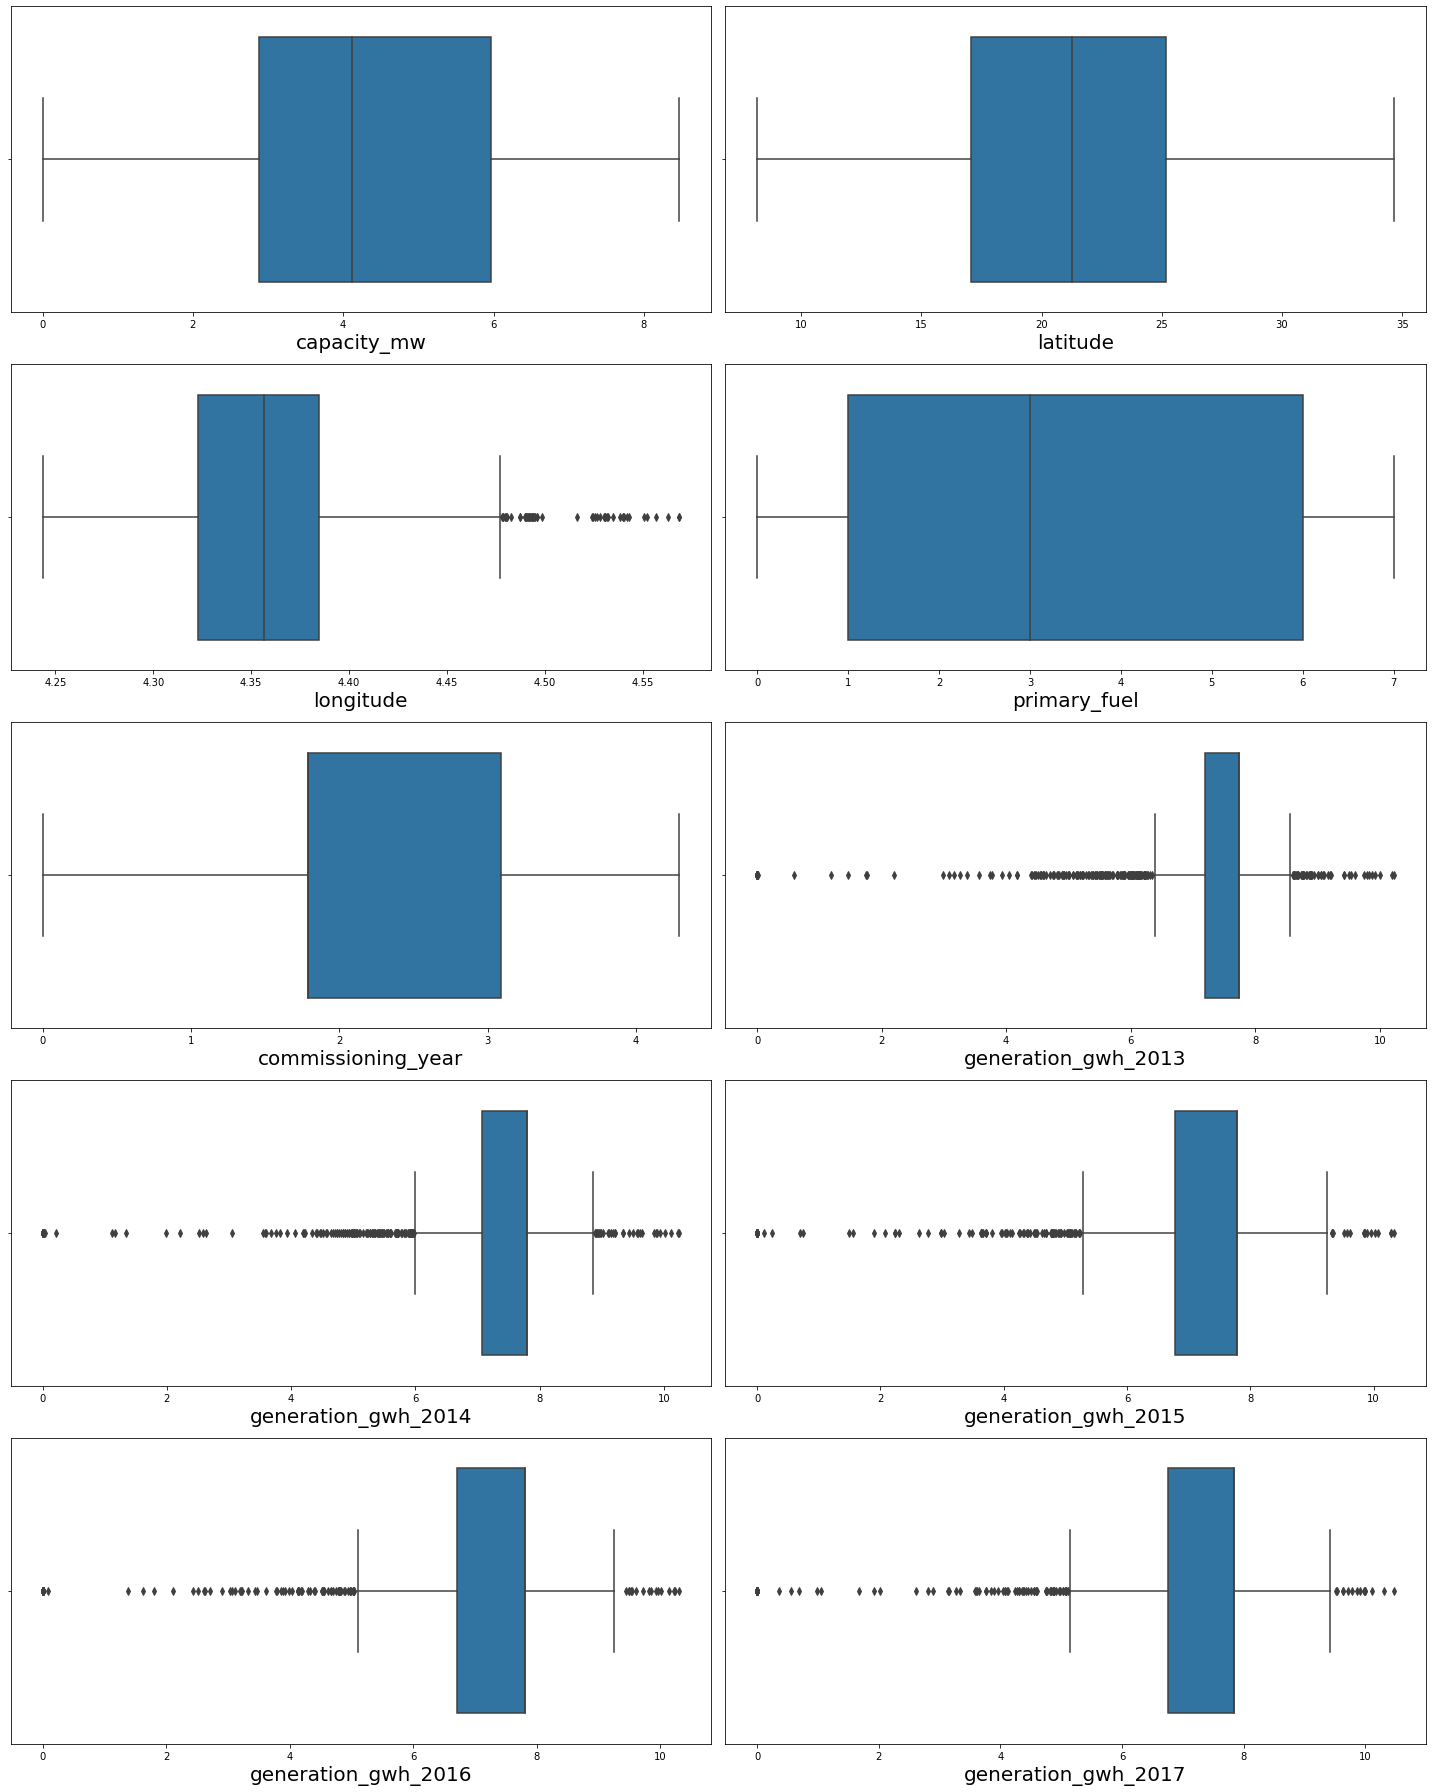

In [31]:
#lets check for outliers using box plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [32]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove our outiers using z_score
z=np.abs(stats.zscore(data))#abs=absolute numberprint(z)
print(z)

[[1.6340626  1.1483961  0.9010043  ... 0.39906319 0.40408601 0.40311963]
 [0.16015781 0.58673028 0.59249618 ... 0.39906319 0.40408601 0.40311963]
 [0.32364638 0.11629242 1.8047639  ... 0.39906319 0.40408601 0.40311963]
 ...
 [0.54734828 0.97298691 0.37669217 ... 0.39906319 0.40408601 0.40311963]
 [0.05243519 0.51831341 0.78603384 ... 0.39906319 0.40408601 0.40311963]
 [0.77009551 1.85081984 0.03638046 ... 0.39906319 0.40408601 0.40311963]]


In [33]:

print('Row Numbers:',np.where(z>3)[0])


Row Numbers: [ 23  23  39  39  39  58  60  60  60  62  65  65  73  73  73  73  73  87
  87 102 106 107 107 134 161 161 161 169 169 169 169 180 184 205 205 205
 205 205 223 223 223 223 224 224 224 224 238 245 255 255 259 260 260 260
 276 276 276 278 278 313 313 333 333 333 333 333 334 337 341 347 352 354
 359 359 359 359 361 386 386 417 419 421 421 421 421 421 428 436 436 436
 436 436 449 461 469 469 471 478 478 478 478 481 512 520 526 526 526 526
 526 548 548 549 564 566 570 570 570 570 570 577 586 586 586 590 590 591
 602 629 629 638 639 645 647 647 651 651 651 651 651 684 684 684 685 691
 700 724 747 747 747 748 748 748 792 792 792 792 792 796 796 810 814 814
 818 818 818 818 819 823 851 851 862 874 874 902 902 902 903]


In [34]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [35]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,4.307313,6,2.079442,7.742862,7.792098,7.789485,7.805856,7.837063
1,4.595120,24.7663,4.325575,1,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
2,3.693867,21.9038,4.253813,7,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
3,4.912655,23.8712,4.525696,2,2.708050,6.450120,6.427765,6.739037,6.787850,6.499448
4,7.496097,21.9603,4.423757,1,1.386294,7.420154,8.018477,8.685647,8.739376,8.591666


In [36]:
data.shape

(822, 10)

In [91]:
#Splitting the features and label
x=data.drop(columns=['latitude','longitude','capacity_mw',],axis=1)
y=data['capacity_mw']

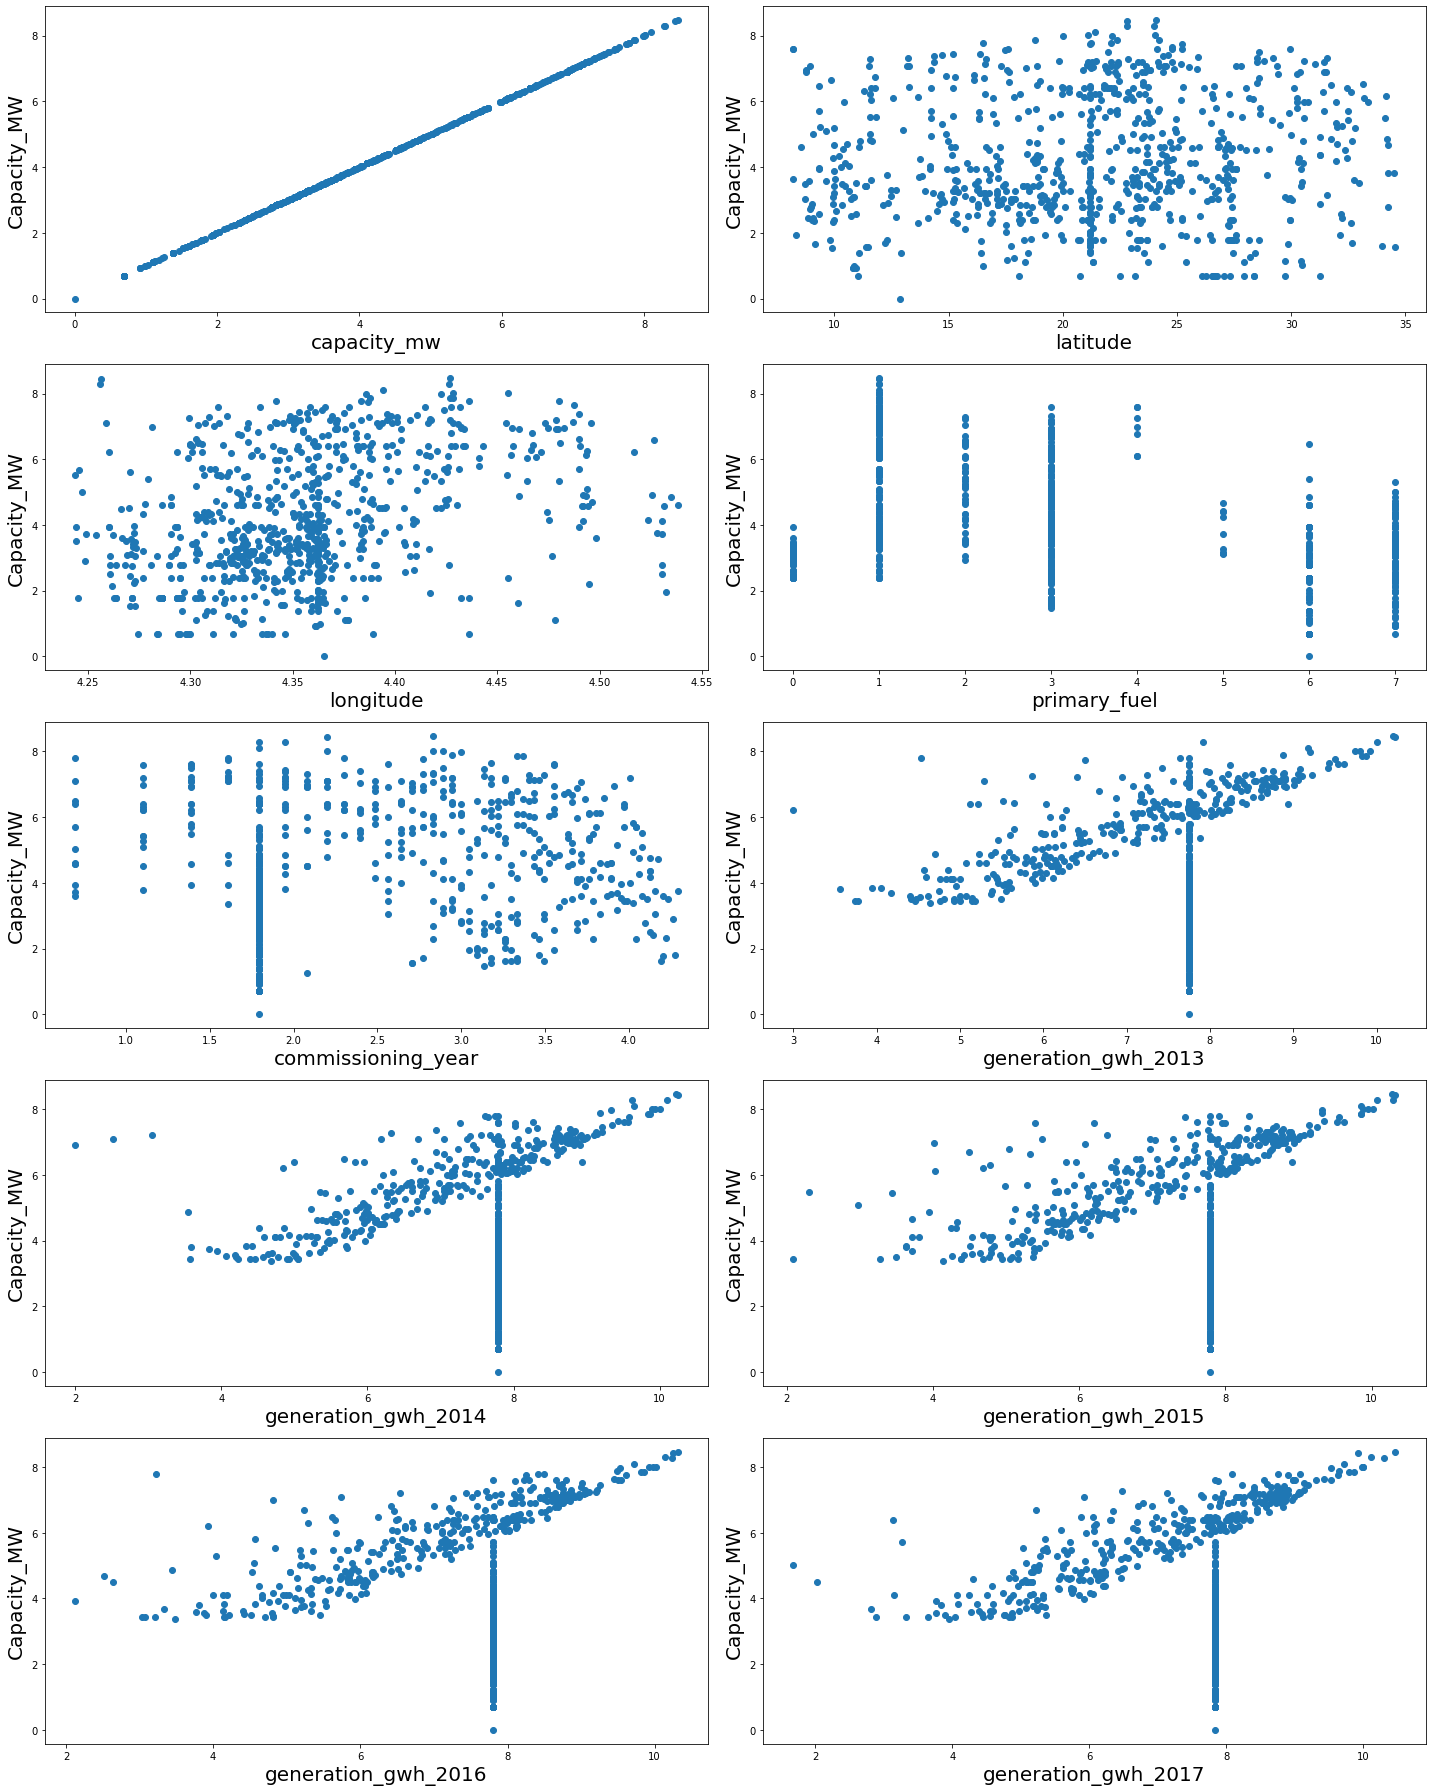

In [92]:
#Lets plot scatter plot to check the relation between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter(data[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Capacity_MW',fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the scatter plot we can know the relation between the features and the label we can visualise the data easily by using the scatter plot.From this we can know that latitude and longitude data is not much correlated with the capacity.But where as the generation of power in different years are highly correlated with the capacity.So those features will contribute more to predict our label capacity.So thats the reason i have dropped latitude and longitude columns. 

In [93]:
#Transforming data to remove skewness
#Importing power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method=('yeo-johnson'))
x

array([[ 1.11999502, -0.16997203,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       ...,
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694]])

In [94]:
#scailing some of the columns because of the continous data in the columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.11999502, -0.16997203,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       ...,
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877694]])

### Train Test Split

In [95]:
#splitting the dataset into train and test using train_test_split method
#importing train test split
from sklearn.model_selection import train_test_split
#dividing the x and y variables into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)


### Regression Algorithms

In [96]:
#Importing some Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Linear Regression

In [97]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [98]:
y_pred=lr.predict(x_test)

### Training Score

In [99]:
lr.score(x_train,y_train)

0.27719090301431415

### Test Score

In [100]:
lr.score(x_test,y_test)

0.27307431192964016

### Cross Validation Score

In [101]:
#Finding cross val score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  25.49318275218846


### Evaluation Metrics

In [102]:
mean_squared_error(y_test,y_pred)

2.5838355805179996

In [103]:
mean_absolute_error(y_test,y_pred)

1.365270302779462

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.6074313610596254

### KNeighbors Regressor

In [105]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

### Prediction

In [106]:
y_pred=knn.predict(x_test)

### Training score

In [107]:
knn.score(x_train,y_train)

0.8049730885596484

### Testing score

In [108]:
knn.score(x_test,y_test)*100

73.5274954786589

### Cross validation score

In [109]:
#Finding cross val score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  73.92727347760125


### Evaluation Metrics

In [110]:
mean_squared_error(y_test,y_pred)

0.9409572424003285

In [111]:
mean_absolute_error(y_test,y_pred)

0.6949072234222136

In [112]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9700295059431587

### Decision Tree Regressor

In [113]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

### Prediction

In [114]:
#Predicting for x_test
y_pred_test=DT.predict(x_test)

### Training Score

In [115]:
DT.score(x_train,y_train)

0.8719286491447421

### Testing score

In [116]:
#score
DT.score(x_test,y_test)*100

80.21791363025984

In [117]:
#Finding cross val score
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  80.01951357513923


### Evaluation Metrics

In [118]:
mean_squared_error(y_test,y_pred)

0.9409572424003285

In [119]:
mean_absolute_error(y_test,y_pred)

0.6949072234222136

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9700295059431587

### Random Forest Regressor

In [121]:
Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)

RandomForestRegressor()

### Prediction

In [122]:
y_pred=Rf.predict(x_test)

### Training score

In [123]:
Rf.score(x_train,y_train)

0.8653817944226914

### Testing score

In [124]:
Rf.score(x_test,y_test)*100

83.54788926710978

In [125]:
#Finding cross val score
scr=cross_val_score(Rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.73448902820988


In [126]:
mean_squared_error(y_test,y_pred)

0.5847853471667278

In [127]:
mean_absolute_error(y_test,y_pred)

0.5693627421707643

In [128]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.7647125912175945

### Support Vector Machine

In [129]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

### Prediction

In [130]:
y_pred=svm.predict(x_test)

### Training score

In [131]:
svm.score(x_train,y_train)

0.7344251388449792

### Testing Score

In [132]:
svm.score(x_test,y_test)*100

68.68635577414403

### Cross validation score

In [133]:
np.mean(cross_val_score(svm,x,y,cv=5))

0.71163111800011

### Evaluation Metrics

In [134]:
mean_squared_error(y_test,y_pred)

1.1130341028561552

In [135]:
mean_absolute_error(y_test,y_pred)

0.777430044571343

In [136]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.055004314141016

### Extreme Gradient Boost Regressor

In [137]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [138]:
y_pred=xgb.predict(x_test)

### Training Score

In [139]:
xgb.score(x_train,y_train)

0.8718658293238791

### Testing score

In [140]:
xgb.score(x_test,y_test)

0.8393219431433168

### Cross validation score

In [141]:
cross=cross_val_score(xgb,x,y,cv=5)
print(np.mean(cross))

0.8251421173650595


### Evaluation Metrics

In [88]:
mean_squared_error(y_test,y_pred)

0.6111497629997915

In [89]:
mean_absolute_error(y_test,y_pred)

0.5983966655679271

np.sqrt(mean_squared_error(y_test,y_pred))

### Hyper Parameter tuning

### Final Model

### Random Forest Regressor

In [142]:
#Hyper Parameter Tuning using GridSearchCV
params={"n_estimators":[20,40,80],"max_features":["auto", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False],'max_depth':[5,10,15],'min_samples_leaf':np.arange(2,10)}


In [143]:
grid = GridSearchCV(Rf,param_grid=params,cv=5,n_jobs=-1)


In [145]:
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [146]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 20}

In [153]:
rf=RandomForestRegressor(bootstrap=True,max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=4,n_estimators=20)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=20)

### Prediction

In [154]:
y_pred_rf=rf.predict(x_test)
y_pred

array([5.5552826, 4.402356 , 6.1825624, 3.0278718, 2.9960415, 6.0662947,
       3.0278718, 5.5654163, 2.1191196, 2.417184 , 2.1191196, 4.099267 ,
       3.8402436, 2.1191196, 2.1191196, 2.9960415, 6.314058 , 4.1081834,
       2.9960415, 2.9960415, 3.7521832, 2.9960415, 6.427591 , 2.1191196,
       3.774674 , 3.8402436, 3.8402436, 2.9960415, 2.3204885, 5.8500047,
       1.8649663, 6.7490973, 6.2699633, 7.1123033, 3.8838053, 2.8956397,
       3.8402436, 6.914986 , 2.2438653, 6.1262684, 6.9020405, 2.381262 ,
       4.927867 , 4.584115 , 6.2678924, 2.1191196, 3.8402436, 3.0798328,
       3.6990366, 3.0278718, 2.9960415, 3.9594207, 4.4720883, 5.697802 ,
       3.0278718, 6.5710454, 5.6059775, 4.8621917, 2.1191196, 3.8402436,
       3.8402436, 2.1191196, 2.9960415, 3.0278718, 6.7515454, 2.1191196,
       5.5571814, 2.9960415, 6.9283166, 2.1191196, 4.086023 , 6.854604 ,
       5.759964 , 2.9960415, 7.0074873, 2.9960415, 2.9960415, 5.95472  ,
       3.0278718, 2.9960415, 6.6157994, 3.0278718, 

### Training Score

In [155]:
rf.score(x_train,y_train)

0.845438426568741

### Testing Score

In [156]:
rf.score(x_test,y_test)

0.8451040402271979

### Cross validation score

In [157]:
#Finding cross val score
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.78373849577802


### Evaluation Metrics

In [158]:
mean_squared_error(y_test,y_pred_rf)

0.550573048535207

In [159]:
mean_absolute_error(y_test,y_pred_rf)

0.5651753465633818

In [160]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

0.7420060973706396

We have achieved 84% accuracy using Random forest regressor after Hyper parameter tuning using grid search cv.So am building the model using Random Forest.

### Saving the model

In [163]:
import joblib
joblib.dump(rf,"Global power capacity in MW prediction.csv")

['Global power capacity in MW prediction.csv']

### Conclusion

In [169]:
print(y_pred_rf[:15])
print(y_test.values[:15])

[5.29529697 4.31819337 6.19847338 3.02907592 2.9941077  6.37830526
 3.02907592 5.92966813 2.11137785 2.45241392 2.11137785 3.91305751
 3.83628445 2.11137785 2.11137785]
[5.08759634 4.56434819 6.39859493 2.39789527 1.38629436 6.11146734
 2.39789527 5.08140436 3.71357207 1.60943791 0.69314718 3.93182563
 4.83628191 1.79175947 1.79175947]


The train and test data has same score and the maximum score is 84%.

### Predicting the Type of Fuel

In [352]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,4.307313,6,2.079442,7.742862,7.792098,7.789485,7.805856,7.837063
1,4.595120,24.7663,4.325575,1,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
2,3.693867,21.9038,4.253813,7,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
3,4.912655,23.8712,4.525696,2,2.708050,6.450120,6.427765,6.739037,6.787850,6.499448
4,7.496097,21.9603,4.423757,1,1.386294,7.420154,8.018477,8.685647,8.739376,8.591666


In [353]:
data['primary_fuel'].value_counts()

1    232
3    231
6    126
7    123
0     50
2     43
5     10
4      7
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

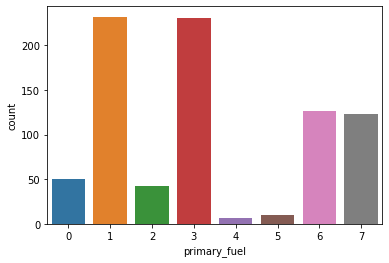

In [354]:
sns.countplot(data['primary_fuel'])

0---solar----source---(sun)

1----Thermal----source(coal)

2----wind-----source(wind)

3----gas------source(gas)

4----hydro------source(water)

5-----biomass-----sourcs(waste)

6------oil------source(oil)

7--------nuclear-----source(fossil fuels(like uranium,plutonium))

The usage of coal and gas for generation of power is more in our country compared to all other renewable resources.

In [355]:
X=data.drop(columns=['primary_fuel'],axis=1)
Y=data['primary_fuel']

In [356]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,4.307313,2.079442,7.742862,7.792098,7.789485,7.805856,7.837063
1,4.595120,24.7663,4.325575,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
2,3.693867,21.9038,4.253813,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
3,4.912655,23.8712,4.525696,2.708050,6.450120,6.427765,6.739037,6.787850,6.499448
4,7.496097,21.9603,4.423757,1.386294,7.420154,8.018477,8.685647,8.739376,8.591666


In [357]:
X.shape

(822, 9)

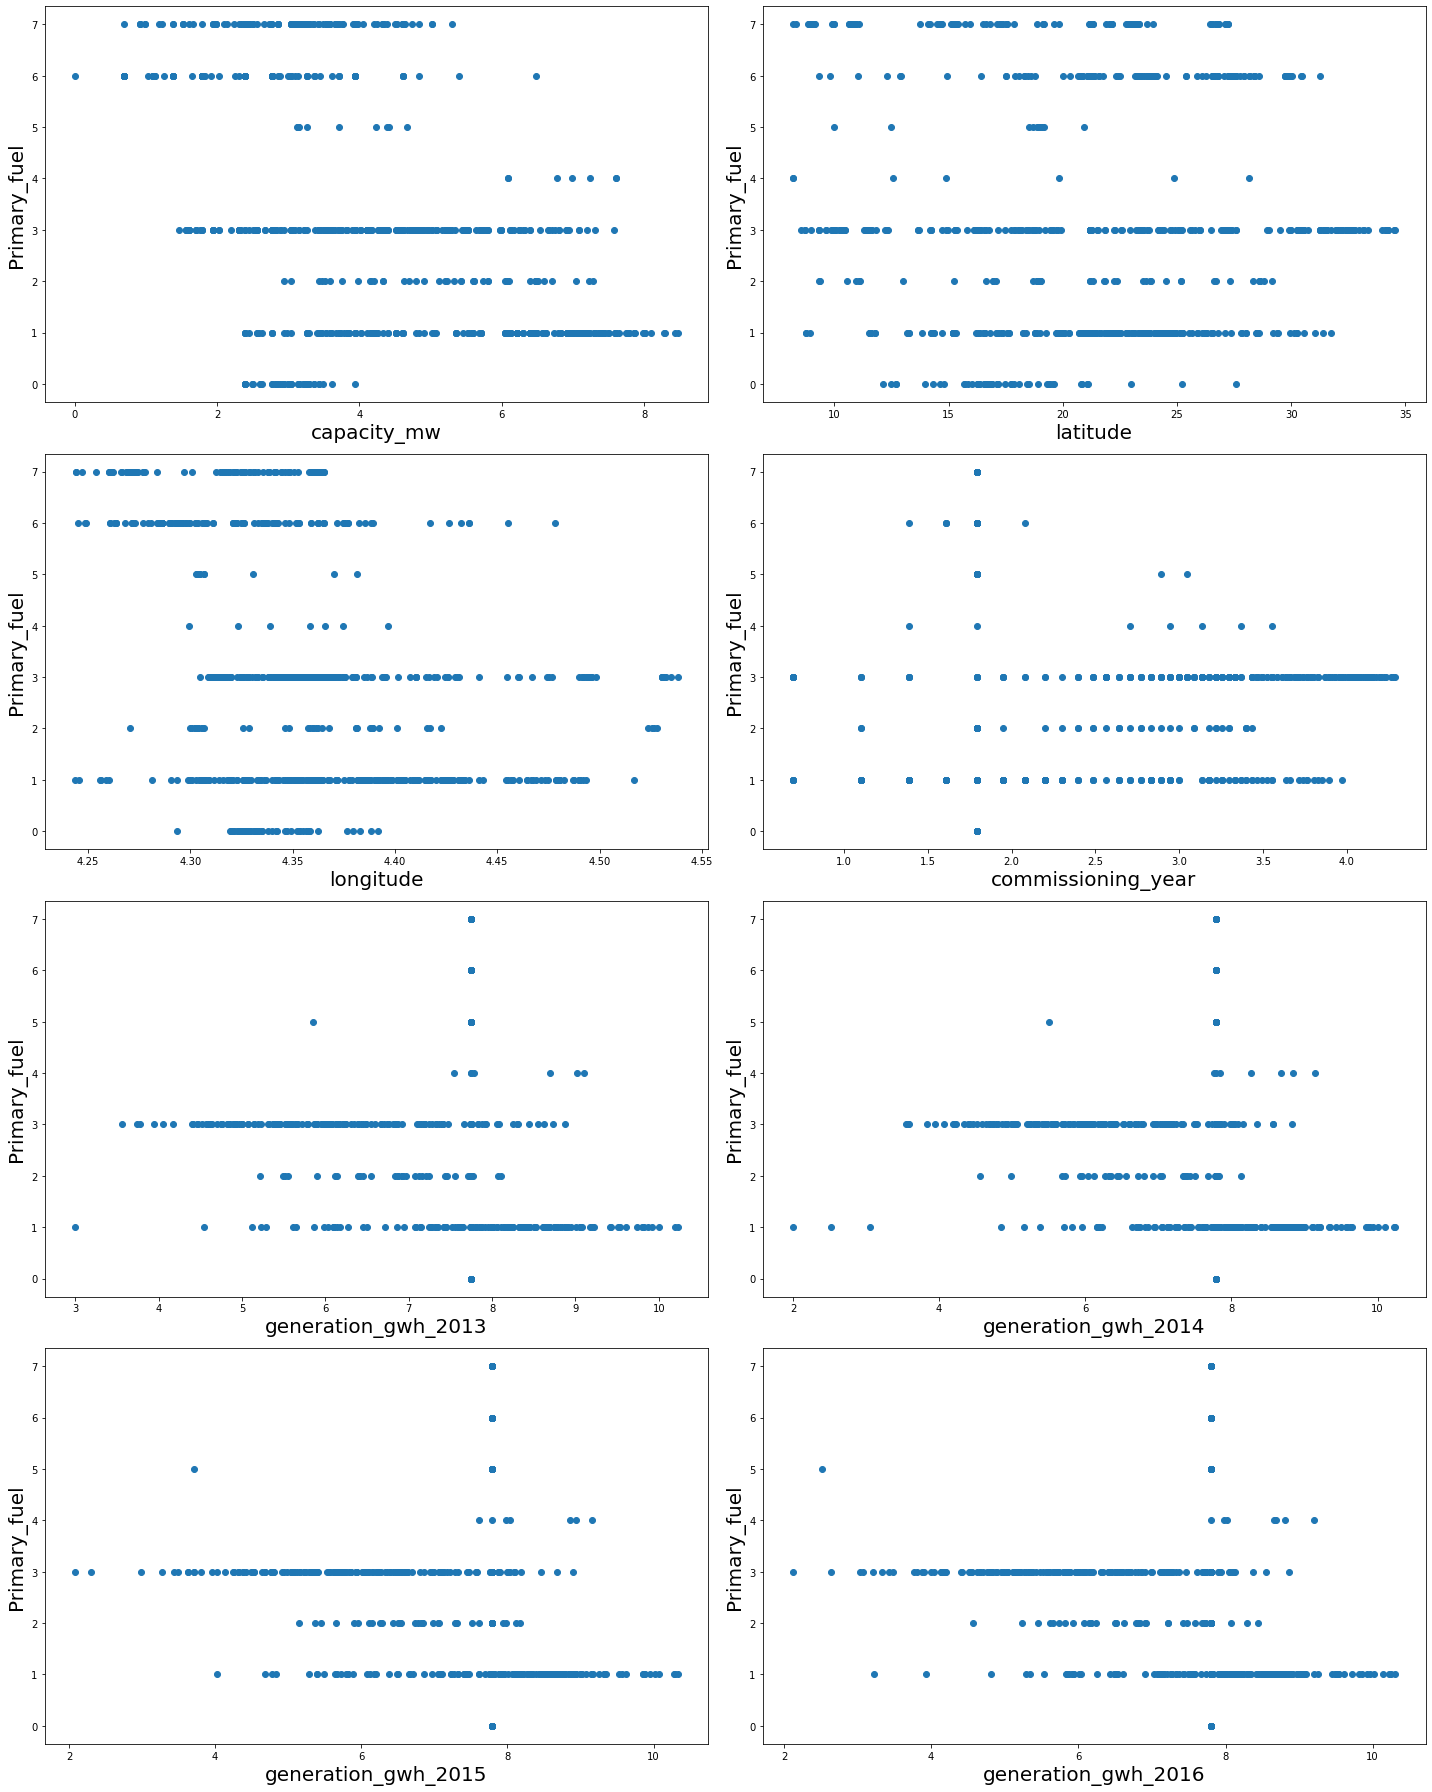

In [358]:
#Lets plot scatter plot to check the relation between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Primary_fuel',fontsize=20)
    plotnumber+=1
plt.tight_layout()


There is no much correlation exists between features and label.There is only little correlation exists with feature with some classes.

In [359]:
#Transforming data to remove skewness
#Importing power transform
from sklearn.preprocessing import power_transform
X=power_transform(X,method=('yeo-johnson'))
X

array([[-1.71423543,  1.14741733, -0.90865434, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 0.2881888 ,  0.56704371, -0.51923105, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.18346561,  0.08879275, -2.25000123, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       ...,
       [-0.41462069, -0.98625097, -0.25961553, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 0.18617271,  0.49702632, -0.77884658, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.65460444, -1.81104841,  0.21634627, ...,  0.22148351,
         0.2282903 ,  0.23877694]])

In [360]:
#scailing some of the columns because of the continous data in the columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.71423543,  1.14741733, -0.91546588, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 0.2881888 ,  0.56704371, -0.52603361, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.18346561,  0.08879275, -2.2568437 , ...,  0.22148351,
         0.2282903 ,  0.23877694],
       ...,
       [-0.41462069, -0.98625097, -0.2664121 , ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [ 0.18617271,  0.49702632, -0.78565512, ...,  0.22148351,
         0.2282903 ,  0.23877694],
       [-0.65460444, -1.81104841,  0.20956067, ...,  0.22148351,
         0.2282903 ,  0.23877694]])

In [361]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(X,Y)
y_over.value_counts()


7    232
6    232
5    232
4    232
3    232
2    232
1    232
0    232
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

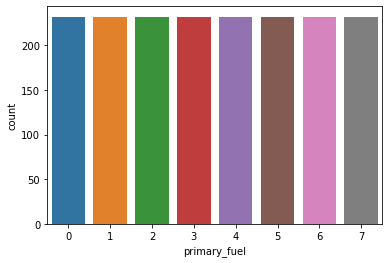

In [431]:
sns.countplot(y_over)

### Train Test Split

In [362]:
#splitting the dataset into train and test using train_test_split method
#importing train test split
from sklearn.model_selection import train_test_split
#dividing the x and y variables into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=50)


###  Multi Class Classification Algorithms

In [363]:
#importing some of the libraries to build our model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve

### KNeighbors classifier

In [364]:
#instansiating
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

### Prediction

In [365]:
knn_y_pred=knn.predict(x_test)

### Training Score

In [366]:
knn.score(x_train,y_train)

0.8783679753656659

### Testing Score

In [367]:
knn.score(x_test,y_test)

0.8258527827648114

In [368]:
accuracy_score(y_test,knn_y_pred)

0.8258527827648114

### Cross validation score

In [369]:
np.mean(cross_val_score(knn,x_over,y_over,cv=5))

0.8362084456424078

### Evaluation Metrics

In [370]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        68
           1       0.84      0.54      0.66        79
           2       0.71      0.82      0.76        55
           3       0.96      0.83      0.89        77
           4       0.80      1.00      0.89        78
           5       0.87      0.94      0.91        66
           6       0.84      0.81      0.82        72
           7       0.76      0.73      0.74        62

    accuracy                           0.83       557
   macro avg       0.83      0.83      0.82       557
weighted avg       0.83      0.83      0.82       557



In [371]:
confusion_matrix(y_test,knn_y_pred)

array([[65,  1,  0,  0,  0,  0,  2,  0],
       [ 4, 43,  9,  3, 18,  0,  0,  2],
       [ 1,  0, 45,  0,  0,  6,  1,  2],
       [ 0,  4,  8, 64,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 62,  0,  3],
       [ 4,  1,  1,  0,  0,  1, 58,  7],
       [ 6,  1,  0,  0,  0,  2,  8, 45]], dtype=int64)

### Decision Tree Classifier

In [372]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### Prediction

In [373]:
dt_y_pred=dt.predict(x_test)

### Training Score

In [374]:
dt.score(x_train,y_train)

1.0

### Testing score

In [375]:
accuracy_score(y_test,dt_y_pred)

0.8276481149012568

In [376]:
#Cross validation score
np.mean(cross_val_score(dt,x_over,y_over,cv=5))

0.83676781729125

### Evaluation Metrics

In [377]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        68
           1       0.69      0.61      0.64        79
           2       0.76      0.85      0.80        55
           3       0.94      0.82      0.88        77
           4       0.88      0.96      0.92        78
           5       0.86      0.91      0.88        66
           6       0.83      0.93      0.88        72
           7       0.80      0.69      0.74        62

    accuracy                           0.83       557
   macro avg       0.82      0.83      0.82       557
weighted avg       0.83      0.83      0.82       557



In [378]:
confusion_matrix(y_test,dt_y_pred)

array([[58,  5,  0,  0,  0,  0,  1,  4],
       [ 3, 48,  6,  3, 10,  1,  6,  2],
       [ 0,  0, 47,  1,  0,  6,  0,  1],
       [ 0,  7,  5, 63,  0,  2,  0,  0],
       [ 0,  3,  0,  0, 75,  0,  0,  0],
       [ 0,  3,  3,  0,  0, 60,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 67,  4],
       [ 6,  4,  1,  0,  0,  1,  7, 43]], dtype=int64)

### Random Forest Classifier

In [379]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

### Prediction

In [380]:
rf_y_pred=rf.predict(x_test)
y_pred

array([1, 3, 7, 2, 7, 1, 1, 1, 1, 1, 7, 3, 1, 0, 1, 1, 6, 7, 2, 0, 1, 7,
       7, 3, 3, 0, 3, 7, 7, 6, 7, 2, 3, 7, 7, 3, 3, 3, 1, 6, 6, 7, 7, 1,
       7, 3, 5, 3, 1, 0, 1, 6, 0, 1, 6, 7, 7, 1, 3, 6, 3, 0, 3, 0, 1, 3,
       1, 3, 3, 1, 3, 7, 3, 7, 1, 6, 3, 6, 1, 7, 1, 0, 3, 1, 1, 3, 3, 0,
       3, 1, 7, 7, 6, 1, 1, 7, 1, 5, 4, 6, 0, 3, 3, 3, 6, 3, 0, 3, 3, 3,
       1, 1, 1, 7, 1, 3, 6, 3, 7, 7, 0, 0, 3, 1, 3, 3, 0, 6, 6, 1, 1, 7,
       2, 6, 1, 6, 3, 6, 3, 1, 1, 3, 3, 3, 1, 7, 3, 1, 1, 3, 2, 0, 5, 0,
       6, 1, 6, 2, 1, 7, 7, 1, 3, 6, 3, 1, 3, 1, 1, 6, 3, 6, 3, 6, 2, 0,
       2, 1, 3, 3, 1, 1, 2, 7, 1, 6, 1, 3, 1, 1, 1, 7, 7, 1, 0, 6, 1, 1,
       6, 1, 6, 1, 7, 7, 3, 3, 1, 7, 0, 4, 7, 2, 7, 2, 0, 6, 0, 3, 7, 3,
       6, 1, 7, 3, 2, 3, 6, 1, 1, 1, 1, 3, 1, 0, 1, 1, 3, 3, 3, 3, 1, 3,
       6, 6, 2, 3, 6])

### Training score

In [381]:
rf.score(x_train,y_train)

1.0

### Testing score

In [382]:
#Printing score
rf.score(x_test,y_test)

0.8581687612208259

In [383]:
accuracy_score(y_test,rf_y_pred)

0.8581687612208259

### Cross validation score

In [384]:
np.mean(cross_val_score(rf,x_over,y_over,cv=5))

0.8830971219893924

### Evaluation Metrics

In [385]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        68
           1       0.78      0.58      0.67        79
           2       0.79      0.82      0.80        55
           3       0.90      0.90      0.90        77
           4       0.85      0.99      0.91        78
           5       0.90      0.94      0.92        66
           6       0.89      0.92      0.90        72
           7       0.86      0.81      0.83        62

    accuracy                           0.86       557
   macro avg       0.85      0.86      0.85       557
weighted avg       0.86      0.86      0.85       557



In [386]:
confusion_matrix(y_test,rf_y_pred)

array([[63,  3,  0,  0,  0,  0,  2,  0],
       [ 4, 46,  8,  8, 11,  0,  0,  2],
       [ 0,  0, 45,  0,  3,  6,  0,  1],
       [ 0,  6,  2, 69,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 77,  0,  0,  0],
       [ 0,  1,  2,  0,  0, 62,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 66,  4],
       [ 4,  1,  0,  0,  0,  1,  6, 50]], dtype=int64)

### Support Vector Classifier

In [387]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

### Prediction

In [388]:
svm_y_pred=svm.predict(x_test)

### Training score

In [389]:
svm.score(x_train,y_train)

0.798306389530408

### Testing score

In [390]:
accuracy_score(y_test,svm_y_pred)

0.7540394973070018

### Cross validation score

In [391]:
np.mean(cross_val_score(svm,x_over,y_over,cv=5))

0.774247166913022

### Evaluation Metrics

In [392]:
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78        68
           1       0.62      0.51      0.56        79
           2       0.77      0.62      0.69        55
           3       0.89      0.83      0.86        77
           4       0.89      1.00      0.94        78
           5       0.75      0.92      0.83        66
           6       0.76      0.67      0.71        72
           7       0.66      0.50      0.57        62

    accuracy                           0.75       557
   macro avg       0.75      0.75      0.74       557
weighted avg       0.75      0.75      0.75       557



In [393]:
confusion_matrix(y_test,svm_y_pred)

array([[64,  0,  0,  0,  0,  0,  3,  1],
       [ 8, 40,  7,  6, 10,  1,  4,  3],
       [ 0,  5, 34,  2,  0, 14,  0,  0],
       [ 0, 10,  3, 64,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  5,  0,  0,  0, 61,  0,  0],
       [ 6,  4,  0,  0,  0,  2, 48, 12],
       [19,  1,  0,  0,  0,  3,  8, 31]], dtype=int64)

### Extreme Gradient Boost Classifier

In [394]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

[22:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [395]:
xgb_y_pred=xgb.predict(x_test)

### Training Score

In [396]:
xgb.score(x_train,y_train)

1.0

### Testing Score

In [401]:
accuracy_score(y_test,xgb_y_pred)

0.8689407540394973

### Cross validation score

In [402]:
np.mean(cross_val_score(xgb,x_over,y_over,cv=5))

[22:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.8911819262093152

### Evaluation Metrics

In [403]:
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        68
           1       0.81      0.63      0.71        79
           2       0.78      0.78      0.78        55
           3       0.90      0.92      0.91        77
           4       0.91      1.00      0.95        78
           5       0.87      0.94      0.91        66
           6       0.92      0.92      0.92        72
           7       0.87      0.84      0.85        62

    accuracy                           0.87       557
   macro avg       0.86      0.87      0.86       557
weighted avg       0.87      0.87      0.87       557



In [404]:
confusion_matrix(y_test,xgb_y_pred)

array([[62,  4,  0,  0,  0,  0,  1,  1],
       [ 5, 50,  7,  7,  7,  0,  1,  2],
       [ 1,  1, 43,  1,  1,  8,  0,  0],
       [ 0,  4,  2, 71,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  1,  2,  0,  0, 62,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 66,  4],
       [ 3,  1,  1,  0,  0,  1,  4, 52]], dtype=int64)

### Navie Bayes Gaussian Classifier

In [405]:
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [406]:
nb_y_pred=nb.predict(x_test)


In [407]:
accuracy_score(y_test,nb_y_pred)

0.5170556552962298

In [408]:
np.mean(cross_val_score(nb,x_over,y_over,cv=5))

0.5285699794220792

In [409]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.55      0.87      0.67        68
           1       0.72      0.16      0.27        79
           2       0.57      0.55      0.56        55
           3       0.82      0.61      0.70        77
           4       0.70      1.00      0.83        78
           5       0.33      0.09      0.14        66
           6       0.64      0.10      0.17        72
           7       0.26      0.77      0.39        62

    accuracy                           0.52       557
   macro avg       0.58      0.52      0.47       557
weighted avg       0.59      0.52      0.47       557



In [410]:
confusion_matrix(y_test,nb_y_pred)

array([[59,  0,  0,  0,  0,  0,  0,  9],
       [ 6, 13, 11,  5, 26,  0,  0, 18],
       [ 4,  2, 30,  4,  4,  0,  0, 11],
       [ 0,  3, 12, 47,  3, 12,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [23,  0,  0,  1,  0,  6,  4, 32],
       [ 1,  0,  0,  0,  0,  0,  7, 64],
       [14,  0,  0,  0,  0,  0,  0, 48]], dtype=int64)

### ROC AUC Score

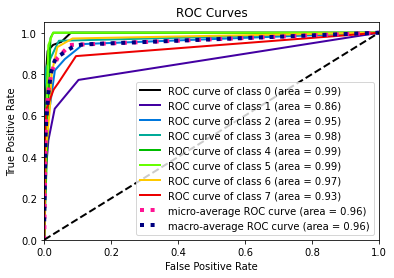

In [411]:
import scikitplot as skplt
#Lets find Roc Auc score
#KNN
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

The area under class 1 is less compared to all the other classes.

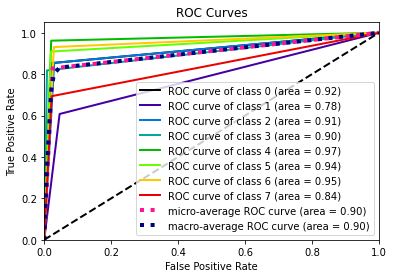

In [412]:
#Lets find Roc Auc score
#Decision TreeRandom forest
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

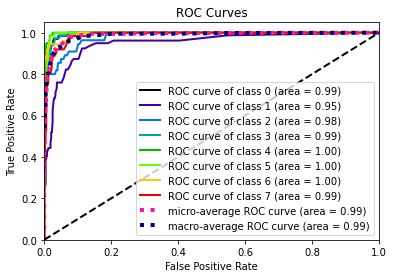

In [413]:
#Lets find Roc Auc score
#Random Forest
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

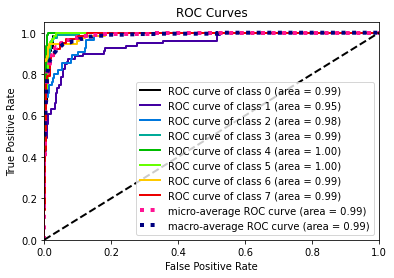

In [414]:
#Lets find Roc Auc score
#Extreme gradient boost
probas=xgb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

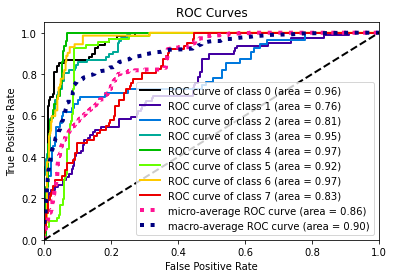

In [415]:
#Lets find Roc Auc score
#Navies Bayes
probas=nb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

The ROC and AUC score is good for both Xgboost and Random Forest so by using any of the model we can build our model.

### Hyper Parameter Tuning

### Final model

In [416]:
#Randomised Search CV
param_grid={
    'max_depth':[5,10],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion':['gini','entropy']
}

In [417]:
random_search=RandomizedSearchCV(rf, param_grid,cv=5,n_jobs=-1)

In [418]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 300]})

In [419]:
random_search.best_params_

{'n_estimators': 300,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [420]:
RF=RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=10,criterion='entropy')
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [421]:
RF_pred=RF.predict(x_test)
RF_pred

array([3, 0, 0, 7, 2, 5, 6, 7, 5, 6, 3, 7, 6, 2, 1, 0, 2, 6, 0, 6, 5, 1,
       0, 4, 7, 7, 0, 1, 7, 3, 4, 6, 0, 4, 5, 1, 5, 0, 3, 3, 5, 4, 0, 2,
       7, 5, 4, 7, 3, 1, 5, 7, 6, 6, 3, 1, 3, 1, 3, 2, 4, 2, 0, 3, 4, 1,
       7, 4, 2, 2, 4, 4, 3, 1, 3, 3, 0, 0, 0, 3, 6, 7, 7, 2, 3, 4, 0, 3,
       2, 3, 4, 1, 4, 6, 0, 3, 7, 2, 3, 5, 3, 0, 4, 4, 6, 3, 2, 5, 4, 5,
       4, 5, 4, 7, 7, 2, 6, 0, 6, 2, 1, 2, 5, 6, 2, 1, 5, 4, 1, 0, 6, 4,
       0, 0, 7, 2, 3, 7, 6, 5, 2, 2, 1, 1, 6, 3, 3, 5, 2, 5, 6, 2, 4, 2,
       4, 5, 1, 1, 1, 4, 5, 0, 4, 1, 7, 0, 7, 7, 0, 6, 4, 5, 4, 1, 7, 1,
       3, 5, 6, 2, 0, 6, 4, 0, 4, 0, 5, 5, 7, 4, 1, 4, 7, 6, 0, 4, 1, 0,
       0, 0, 0, 3, 6, 5, 5, 0, 5, 7, 5, 4, 3, 2, 6, 0, 4, 5, 1, 4, 2, 5,
       2, 1, 4, 6, 6, 6, 0, 6, 2, 4, 3, 7, 7, 7, 5, 2, 7, 6, 5, 6, 7, 2,
       3, 5, 4, 6, 1, 2, 3, 3, 3, 7, 4, 3, 0, 4, 4, 2, 4, 0, 1, 2, 1, 4,
       0, 1, 0, 0, 7, 3, 7, 6, 4, 4, 4, 5, 3, 7, 0, 3, 4, 4, 3, 1, 6, 5,
       6, 5, 5, 0, 1, 7, 5, 4, 4, 0, 6, 1, 4, 4, 6,

### Training Score

In [422]:
RF.score(x_train,y_train)

0.9607390300230947

### Testing score

In [423]:
RF.score(x_test,y_test)

0.8563734290843806

### Accuracy score

In [424]:
accuracy_score(y_test,RF_pred)

0.8563734290843806

### Cross validation score

In [425]:
np.mean(cross_val_score(RF,x_over,y_over,cv=5))

0.869082398632003

### Evaluation Metrics

In [426]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        68
           1       0.80      0.56      0.66        79
           2       0.81      0.84      0.82        55
           3       0.92      0.90      0.91        77
           4       0.88      1.00      0.93        78
           5       0.91      0.97      0.94        66
           6       0.82      0.92      0.87        72
           7       0.87      0.76      0.81        62

    accuracy                           0.86       557
   macro avg       0.85      0.86      0.85       557
weighted avg       0.85      0.86      0.85       557



In [427]:
confusion_matrix(y_test,RF_pred)

array([[63,  2,  0,  0,  0,  0,  2,  1],
       [ 5, 44,  7,  6, 10,  0,  5,  2],
       [ 1,  1, 46,  0,  1,  6,  0,  0],
       [ 0,  5,  3, 69,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 64,  0,  1],
       [ 1,  2,  0,  0,  0,  0, 66,  3],
       [ 7,  1,  0,  0,  0,  0,  7, 47]], dtype=int64)

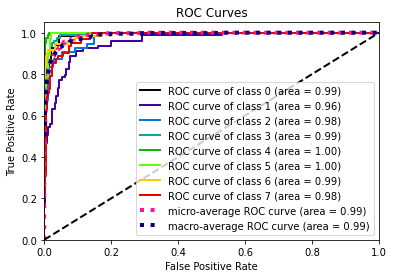

In [428]:
#Lets find Roc Auc score
#Random Forest
probas=RF.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

All most all the classes have the nearest values of ROC scores so that areas for plotting has come one on the other.The scores for Random Forest Classifier is good.So we can go with either the Random Forest or Extreme gradient boost classifier.

After Hyper parameter tuning also there is no improvement in the Scores so am going with Extreme Gradient Boosting Classifier as my final model.

### Model Saving

In [429]:
import pickle
filename='Global power fuel type Prediction.pkl'
pickle.dump(xgb,open(filename,'wb'))

### Prediction Model


### Extreme Gradient Boosting Classifier

In [430]:
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
xgb_y_pred=xgb.predict(x_test)
preds=xgb.predict(x_test)
print(preds)
print(y_test.values)

[22:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[3 0 0 7 2 5 6 7 5 6 3 7 6 2 1 0 2 6 0 6 5 1 0 4 7 7 0 1 7 3 4 6 0 4 5 1 5
 0 3 3 5 4 0 2 7 5 4 7 3 1 5 7 6 6 3 1 3 1 3 3 4 2 0 3 4 1 7 4 2 5 4 4 2 1
 3 1 0 0 0 3 6 7 7 2 3 4 0 3 2 3 4 1 4 6 0 3 1 5 3 5 3 0 4 4 6 3 2 5 4 5 4
 5 4 7 7 2 6 0 0 2 1 2 5 1 2 1 5 4 1 0 6 4 0 0 7 2 3 7 6 5 2 2 1 1 6 3 3 5
 2 5 6 2 4 2 4 5 1 1 1 4 5 0 4 1 7 0 7 7 0 6 4 5 4 1 7 2 3 5 6 3 7 7 4 0 4
 0 5 5 7 4 1 4 5 6 7 4 3 0 0 7 1 3 6 5 5 0 5 7 5 4 3 2 6 0 1 5 3 4 2 5 2 2
 4 6 6 6 0 6 2 4 3 7 7 7 5 3 7 6 5 6 7 2 3 5 4 1 1 2 3 3 1 7 4 3 0 4 4 1 4
 0 1 2 1 4 0 1 0 0 7 3 7 6 1 4 4 5 1 7 0 3 4 4 3 3 6 1 7 5 5 0 1 7 5 4 4 0
 6 1 4 4 6 6 5 7 5 3 2 6 7 6 4 7 7 2 2 7 5 1 5 1 7 3 0 3 2 4 6 6 3 6 5 3 7
 1 5 7 5 1 0 5

We have achieved accuracy score of 86% in predicting the fuel type.